In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
books = pd.read_csv('Books - Books.csv')
ratings = pd.read_csv('Ratings - Ratings.csv')
users = pd.read_csv('Users - Users.csv')

/var/folders/xf/mlscqd8j7yz_4mq7dv489hlh0000gn/T/ipykernel_5249/1767520352.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books - Books.csv')


## Preprocessing Data

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


    We check shape of the data to understand the amount of data we are dealing with and see if there are any instances where data is duplicated and remove them to avoid redundency. 

In [6]:
print("Shape of books dataset : ",books.shape)
print("Shape of users dataset : ",users.shape)
print("Shape of ratings dataset : ",ratings.shape)

Shape of books dataset :  (271360, 8)
Shape of users dataset :  (278858, 3)
Shape of ratings dataset :  (1048575, 3)


In [7]:
print("Duplicates in  books dataset : ",books.duplicated().sum())
print("Duplicates in  users dataset : ",users.duplicated().sum())
print("Duplicates in  ratings dataset : ",ratings.duplicated().sum())

Duplicates in  books dataset :  1
Duplicates in  users dataset :  0
Duplicates in  ratings dataset :  146


In [8]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
111808,486404242,War in Kind: And Other Poems (Dover Thrift Edi...,Stephen Crane,1998,Dover Publications,http://images.amazon.com/images/P/0486404242.0...,http://images.amazon.com/images/P/0486404242.0...,http://images.amazon.com/images/P/0486404242.0...


In [9]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating
11338,709,9.78E+12,9
21604,4334,6.31E+11,0
28622,6575,6.31E+11,0
58876,11676,9.78E+12,9
58877,11676,9.78E+12,9
...,...,...,...
1047765,250634,9.78E+12,0
1047766,250634,9.78E+12,10
1047767,250634,9.78E+12,10
1047768,250634,9.78E+12,10


In [10]:
books = books.drop_duplicates()
ratings = ratings.drop_duplicates()
print("Shape of books dataset : ",books.shape)
print("Duplicates in  books dataset : ",books.duplicated().sum())
print("============================================================")
print("Shape of ratings dataset : ",ratings.shape)
print("Duplicates in  ratings dataset : ",ratings.duplicated().sum())

Shape of books dataset :  (271359, 8)
Duplicates in  books dataset :  0
Shape of ratings dataset :  (1048429, 3)
Duplicates in  ratings dataset :  0


    Now we will see the data and check wether we have to do any changes to it before going to the EDA part, 
    So first before that we will see what are the data types of each datasets.

    First we will check the books dataset.We will be dropping "Image-URL-S" and "Image-URL-L" as we will only be using "Image-URL-M".

### Books Dataset 

In [11]:
books = books.drop(["Image-URL-S","Image-URL-L"],axis = 1)
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271359 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271359 non-null  object
 1   Book-Title           271359 non-null  object
 2   Book-Author          271357 non-null  object
 3   Year-Of-Publication  271359 non-null  object
 4   Publisher            271357 non-null  object
 5   Image-URL-M          271359 non-null  object
dtypes: object(6)
memory usage: 14.5+ MB


In [12]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
dtype: int64

    If we take a look at the books dataset there is no need to worry about missing values as there are very 
    minimal and we will be replacing those slots with "Unknown" prior to that we need to check if the data in 
    those are valid or not.

In [13]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors = 'coerce')
books['Year-Of-Publication'].replace(0, np.nan, inplace=True)
books.loc[books['Year-Of-Publication'] > 2024, 'Year-Of-Publication'] = np.nan
books['Year-Of-Publication'].info()

<class 'pandas.core.series.Series'>
Index: 271359 entries, 0 to 271359
Series name: Year-Of-Publication
Non-Null Count   Dtype  
--------------   -----  
266726 non-null  float64
dtypes: float64(1)
memory usage: 4.1 MB


/var/folders/xf/mlscqd8j7yz_4mq7dv489hlh0000gn/T/ipykernel_5249/2185129957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Year-Of-Publication'].replace(0, np.nan, inplace=True)


In [14]:
books['Year-Of-Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 2024., 1376.])

    From here we can see there are instances where year of publication is more than 2024 and way back to 0, 
    So first we will change them to "Unknown" as we use year data to only display purpose.

In [15]:
books['Year-Of-Publication'].fillna("Unknown",inplace = True)
books['Book-Author'].fillna("Unknown", inplace = True)
books['Publisher'].fillna("Unknown", inplace = True)
books.isnull().sum()

/var/folders/xf/mlscqd8j7yz_4mq7dv489hlh0000gn/T/ipykernel_5249/437001664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Year-Of-Publication'].fillna("Unknown",inplace = True)
/var/folders/xf/mlscqd8j7yz_4mq7dv489hlh0000gn/T/ipykernel_5249/437001664.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  books['Year-Of-Publication'].fillna

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
dtype: int64

In [16]:
books['Year-Of-Publication'].unique()

array([2002.0, 2001.0, 1991.0, 1999.0, 2000.0, 1993.0, 1996.0, 1988.0,
       2004.0, 1998.0, 1994.0, 2003.0, 1997.0, 1983.0, 1979.0, 1995.0,
       1982.0, 1985.0, 1992.0, 1986.0, 1978.0, 1980.0, 1952.0, 1987.0,
       1990.0, 1981.0, 1989.0, 1984.0, 'Unknown', 1968.0, 1961.0, 1958.0,
       1974.0, 1976.0, 1971.0, 1977.0, 1975.0, 1965.0, 1941.0, 1970.0,
       1962.0, 1973.0, 1972.0, 1960.0, 1966.0, 1920.0, 1956.0, 1959.0,
       1953.0, 1951.0, 1942.0, 1963.0, 1964.0, 1969.0, 1954.0, 1950.0,
       1967.0, 2005.0, 1957.0, 1940.0, 1937.0, 1955.0, 1946.0, 1936.0,
       1930.0, 2011.0, 1925.0, 1948.0, 1943.0, 1947.0, 1945.0, 1923.0,
       2020.0, 1939.0, 1926.0, 1938.0, 1911.0, 1904.0, 1949.0, 1932.0,
       1928.0, 1929.0, 1927.0, 1931.0, 1914.0, 1934.0, 1910.0, 1933.0,
       1902.0, 1924.0, 1921.0, 1900.0, 1944.0, 1917.0, 1901.0, 2010.0,
       1908.0, 1906.0, 1935.0, 1806.0, 2021.0, 2012.0, 2006.0, 1909.0,
       2008.0, 1378.0, 1919.0, 1922.0, 1897.0, 2024.0, 1376.0],
      dtyp

In [17]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271359 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271359 non-null  object
 1   Book-Title           271359 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271359 non-null  object
 4   Publisher            271359 non-null  object
 5   Image-URL-M          271359 non-null  object
dtypes: object(6)
memory usage: 14.5+ MB


    Now as books dataset is done we will see the ratings dataset.
    
    We will only check if all the ISBN values are there in books dataset.

### Ratings Dataset 

In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048429 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048429 non-null  int64 
 1   ISBN         1048429 non-null  object
 2   Book-Rating  1048429 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


In [19]:
ratings['ISBN'].nunique()

322102

In [20]:
books['ISBN'].nunique() 

271359

    There are 50743 more codes in ratings dataset when we compare to books dataset we have remove rows where 
    these invalid codes are used in ratings datset.
    
    Below we can see ISBN codes which are not present in the books dataset.

In [21]:
# Convert ISBN columns to sets
isbn_to_check_set = set(ratings['ISBN'])
books_set = set(books['ISBN'])

# Find missing ISBNs using set difference
missing_isbn = isbn_to_check_set - books_set

# Report results
if not missing_isbn:
    print("All ISBN values exist in the Books dataset.")
else:
    print("The following ISBN values are missing from the Books dataset:")
    print(missing_isbn)

The following ISBN values are missing from the Books dataset:
{'3453088336', '140128999', '3853262244', '853070652', '9971640120', '733503853', '6479898', '9706271753', '8423671240', '3572009227', '8487109055', '3426609959', '067370579X', '210519751', '388692866', '733524079', '2290335231', '552141801', '2891119835', '515072557', '1854791001', '9726653525', '887108165X', '3453007271', '3877910406', '9022915115', '552140899', '671571079', '8834708903', '99504308', '026376835X', '140620818', '8482410008', '9171022406', '8804359080', '3828911080', '747247234', '732280737', '8476670141', '8424609867', '552995878', '8887409064', '55306466195', '284146373.7', '1857997735', '8475178014', '583460076X', '7020043275/1', '882700553', '6170528', '3889823548', '821711997', '1563260018', '340658126', '3518394738', '752816950', '3596221234', '718117794', '4651930077', '831786280', '8422674564', '451UQ1079095', '99414732', '8820114690', '842268523X', '751512184', '712665676', '261673955', '3612275410'

In [22]:
# Remove rows from ratings where ISBN is not in books
ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941105 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      941105 non-null  int64 
 1   ISBN         941105 non-null  object
 2   Book-Rating  941105 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.7+ MB


In [23]:
ratings.nunique()

User-ID         83643
ISBN           257814
Book-Rating        11
dtype: int64

    Now we can see the ISBN codes used in ratings data is reduced but we observe that 13545 more ISBN codes are used in books dataset so now we will similarly remove those rows as we did with ratings data.

In [24]:
# Get unique ISBNs from ratings
valid_isbns = set(ratings['ISBN'])

# Filter books DataFrame to keep only those ISBNs present in ratings
books = books[books['ISBN'].isin(valid_isbns)]
books.nunique()

ISBN                   257814
Book-Title             230212
Book-Author             97226
Year-Of-Publication       108
Publisher               16119
Image-URL-M            257526
dtype: int64

In [25]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257814 entries, 0 to 270960
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 257814 non-null  object
 1   Book-Title           257814 non-null  object
 2   Book-Author          257814 non-null  object
 3   Year-Of-Publication  257814 non-null  object
 4   Publisher            257814 non-null  object
 5   Image-URL-M          257814 non-null  object
dtypes: object(6)
memory usage: 13.8+ MB


In [26]:
ratings['User-ID'].nunique()

83643

In [27]:
users['User-ID'].nunique()

278858

    Now we have to checkthe users dataset 

### Users Dataset

In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [29]:
users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

In [30]:
ratings['User-ID'].nunique()

83643

In [31]:
users['User-ID'].nunique() 

278858

    We will remove rows with user ids in users dataset which are not present in ratings dataset, as in users dataset there are 195215 more user id than in ratings dataset.

In [32]:
# Get unique ISBNs from ratings
valid_user_ids = set(ratings['User-ID'])

# Filter books DataFrame to keep only those ISBNs present in ratings
users = users[users['User-ID'].isin(valid_user_ids)]
users.nunique()

User-ID     83643
Location    21106
Age           138
dtype: int64

In [33]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83643 entries, 1 to 278853
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   83643 non-null  int64  
 1   Location  83643 non-null  object 
 2   Age       48859 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB


    Now we will make changes in the age column.

In [34]:
users.isnull().sum()

User-ID         0
Location        0
Age         34784
dtype: int64

In [35]:
users['Age'].unique()

array([ 18.,  nan,  26.,  14.,  19.,  24.,  17.,  51.,  34.,  32.,  43.,
        44.,  37.,  20.,  41.,  42.,  57.,  49.,  47.,  38.,  45.,  35.,
        62.,  28.,  27.,  33.,  23.,  15.,  21.,  16.,  25.,  53.,  59.,
        63.,  22.,  29.,  40.,  48.,  72.,  31.,  58.,  69.,  55.,  36.,
        13.,  30.,  50.,  56.,  52.,  46.,   9.,  39.,  71.,  74.,  54.,
        61.,   0.,  75.,  60.,   3.,   1.,  64.,  66.,  83., 103.,  11.,
        68.,   2.,  12.,  65.,  77.,  73.,  70., 104.,   8.,  76., 239.,
        78.,  67.,  93., 151., 201.,  79.,  80., 244.,  82.,   7., 123.,
       128., 101.,  81.,  10., 141., 219.,  84.,   4.,  96., 124., 133.,
       209., 212.,   5., 237., 156., 136.,  95.,  89., 108., 199.,  92.,
        85., 147.,  90.,  97.,  86., 168., 148., 132., 152., 114., 116.,
       226., 229., 100., 138., 109., 105., 228.,  99., 223., 107., 157.,
       146., 204.,   6., 118.,  94., 220.,  98.])

In [36]:
users['Age'] = pd.to_numeric(users['Age'], errors='coerce')

In [37]:
users[(users['Age']> 100)].head(5)

,User-ID,Location,Age
3436,3437,"honolulu, hawaii, usa",103.0
4254,4255,"genève, genève, switzerland",103.0
6711,6712,"78126 königsfeld, baden-wuerttemberg, germany",104.0
8067,8068,"springfield, illinois, usa",104.0
8781,8782,"calgary, alberta, canada",239.0


In [38]:
users[(users['Age']<5)].head(5)

,User-ID,Location,Age
1460,1461,"kolding, none, denmark",0.0
1849,1850,"sydney, nsw, australia",3.0
2151,2152,"grosse pointe, michigan, usa",1.0
3610,3611,"santa rosa, california, usa",0.0
3676,3677,"darlington, south carolina, usa",2.0


In [39]:
users['Age'].median()

34.0

In [40]:
#Users.loc[Users['Age'] > 100, 'Age'] = Users['Age'].mean()
users.loc[(users['Age'] > 100) | (users['Age'] < 5), 'Age'] = users['Age'].median()

In [41]:
users['Age'].unique()

array([ 18.,  nan,  26.,  14.,  19.,  24.,  17.,  51.,  34.,  32.,  43.,
        44.,  37.,  20.,  41.,  42.,  57.,  49.,  47.,  38.,  45.,  35.,
        62.,  28.,  27.,  33.,  23.,  15.,  21.,  16.,  25.,  53.,  59.,
        63.,  22.,  29.,  40.,  48.,  72.,  31.,  58.,  69.,  55.,  36.,
        13.,  30.,  50.,  56.,  52.,  46.,   9.,  39.,  71.,  74.,  54.,
        61.,  75.,  60.,  64.,  66.,  83.,  11.,  68.,  12.,  65.,  77.,
        73.,  70.,   8.,  76.,  78.,  67.,  93.,  79.,  80.,  82.,   7.,
        81.,  10.,  84.,  96.,   5.,  95.,  89.,  92.,  85.,  90.,  97.,
        86., 100.,  99.,   6.,  94.,  98.])

In [42]:
users['Age'].fillna(users.Age.median(),inplace=True)
users['Age'] = users['Age'].astype('int64')

/var/folders/xf/mlscqd8j7yz_4mq7dv489hlh0000gn/T/ipykernel_5249/3094818217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(users.Age.median(),inplace=True)


In [43]:
users['Age'].unique()

array([ 18,  34,  26,  14,  19,  24,  17,  51,  32,  43,  44,  37,  20,
        41,  42,  57,  49,  47,  38,  45,  35,  62,  28,  27,  33,  23,
        15,  21,  16,  25,  53,  59,  63,  22,  29,  40,  48,  72,  31,
        58,  69,  55,  36,  13,  30,  50,  56,  52,  46,   9,  39,  71,
        74,  54,  61,  75,  60,  64,  66,  83,  11,  68,  12,  65,  77,
        73,  70,   8,  76,  78,  67,  93,  79,  80,  82,   7,  81,  10,
        84,  96,   5,  95,  89,  92,  85,  90,  97,  86, 100,  99,   6,
        94,  98])

In [44]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83643 entries, 1 to 278853
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User-ID   83643 non-null  int64 
 1   Location  83643 non-null  object
 2   Age       83643 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ MB


    Now we will deal with the location column.

In [45]:
# Note: Used Pandas Series.str.split method as it has an 'expand' parameter which can handle None cases
user_location_expanded = users['Location'].str.split(',', n=2, expand=True)
user_location_expanded.columns = ['city', 'state', 'country']
users = users.join(user_location_expanded)

In [46]:
users

,User-ID,Location,Age,city,state,country
1,2,"stockton, california, usa",18,stockton,california,usa
7,8,"timmins, ontario, canada",34,timmins,ontario,canada
8,9,"germantown, tennessee, usa",34,germantown,tennessee,usa
9,10,"albacete, wisconsin, spain",26,albacete,wisconsin,spain
11,12,"fort bragg, california, usa",34,fort bragg,california,usa
...,...,...,...,...,...,...
278845,278846,"toronto, ontario, canada",23,toronto,ontario,canada
278848,278849,"georgetown, ontario, canada",23,georgetown,ontario,canada
278850,278851,"dallas, texas, usa",33,dallas,texas,usa
278851,278852,"brisbane, queensland, australia",32,brisbane,queensland,australia


In [47]:
users.drop(columns = ['Location'],inplace = True)

In [48]:
users.replace('none', 'Unknown', inplace=True)
users.replace('', np.nan, inplace=True)
users.replace('quit', np.nan, inplace=True)
users.replace('n/a', np.nan, inplace=True)

In [49]:
users.loc[users['city'] == users['state'], 'city'] = np.nan
users.loc[users['state'] == users['country'], 'state'] = np.nan
users.loc[users['city'] == users['country'], 'city'] = np.nan

In [50]:
users.replace(np.nan, 'Unknown', inplace=True)
users.isnull().sum()

User-ID    0
Age        0
city       0
state      0
country    0
dtype: int64

In [51]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83643 entries, 1 to 278853
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User-ID  83643 non-null  int64 
 1   Age      83643 non-null  int64 
 2   city     83643 non-null  object
 3   state    83643 non-null  object
 4   country  83643 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


    Now we will continue with EDA part

# EDA

    Now we will do EDA part for each datasets individually.
    
    So First we will do for Books dataset.From this we can get these information :-
        
        1) Distribution of books by publication year.
        2) Most popular authors.
        3) Most popular publishers.

In [58]:
# Unique authors, publishers, and books
print(f"Number of unique authors: {books['Book-Author'].nunique()}")
print(f"Number of unique publishers: {books['Publisher'].nunique()}")
print(f"Number of unique books: {books['Book-Title'].nunique()}")

Number of unique authors: 97226
Number of unique publishers: 16119
Number of unique books: 230212


/Users/revanthkumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


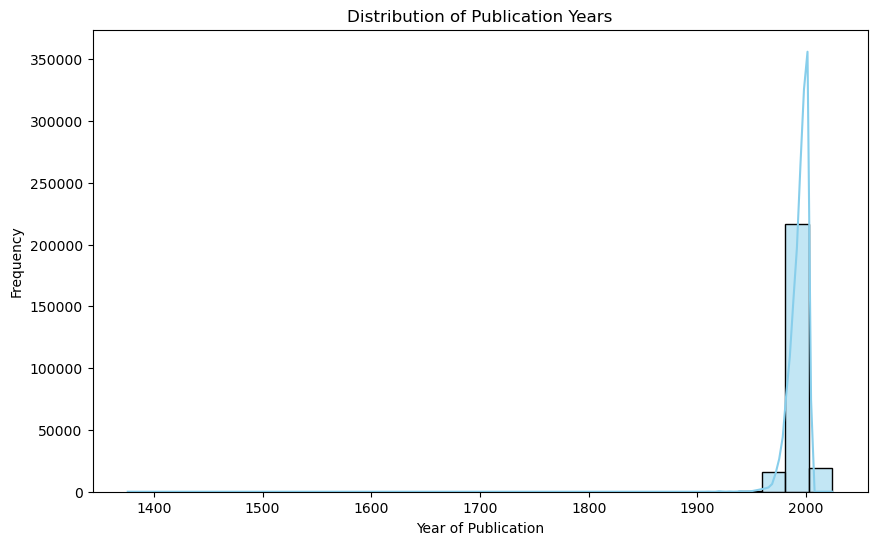

In [56]:
# Distribution of publication years
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')  # Convert to numeric
plt.figure(figsize=(10, 6))
sns.histplot(books['Year-Of-Publication'].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Publication Years")
plt.xlabel("Year of Publication")
plt.ylabel("Frequency")
plt.show()

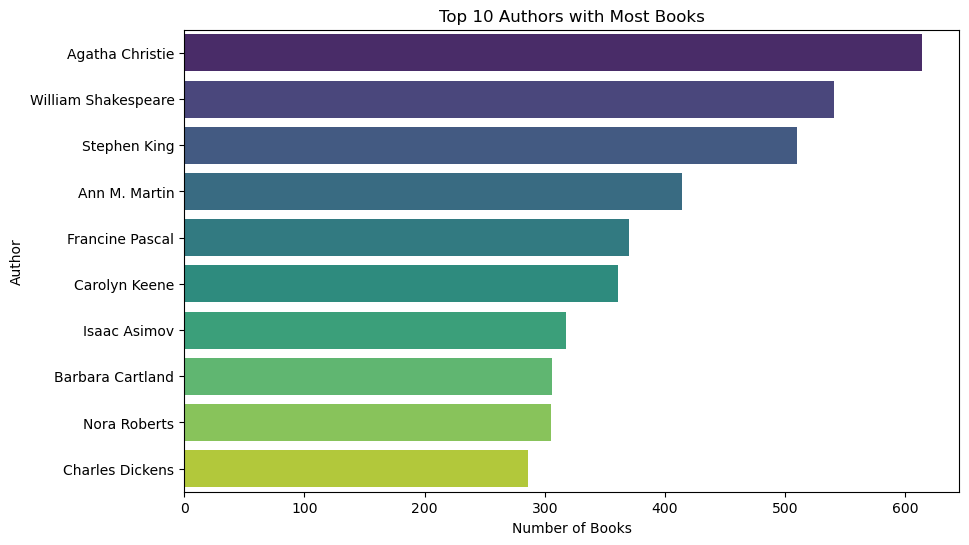

In [57]:
# Top 10 authors with the most books
top_authors = books['Book-Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Authors with Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()

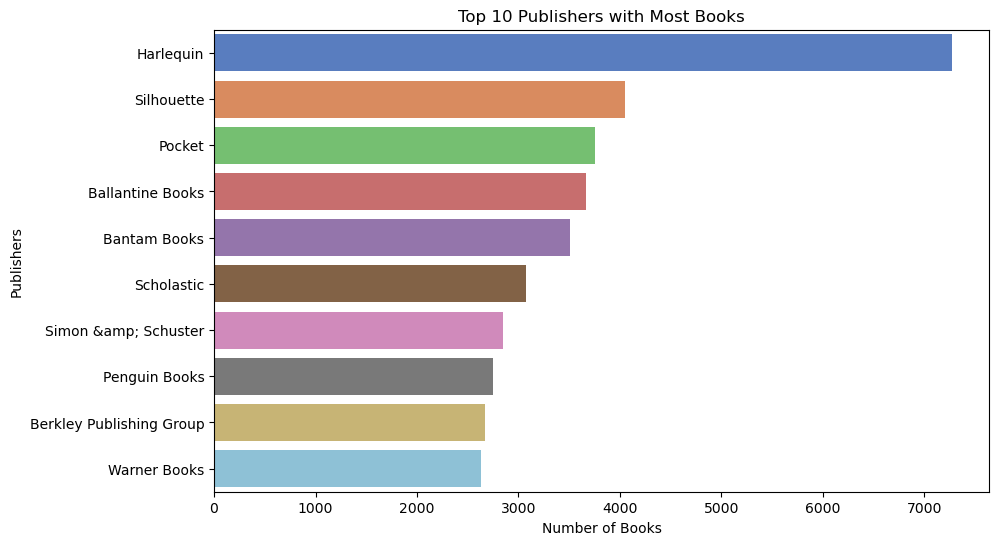

In [63]:
# Top 10 Publishers with the most books
top_publishers = books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="muted")
plt.title("Top 10 Publishers with Most Books")
plt.xlabel("Number of Books")
plt.ylabel("Publishers")
plt.show()

    Now we will look at Ratings dataset.From this we can get these information :-
        
        1) Distribution of ratings (e.g., histogram of rating values).
        2) Top-rated books.
        3) Most active users.

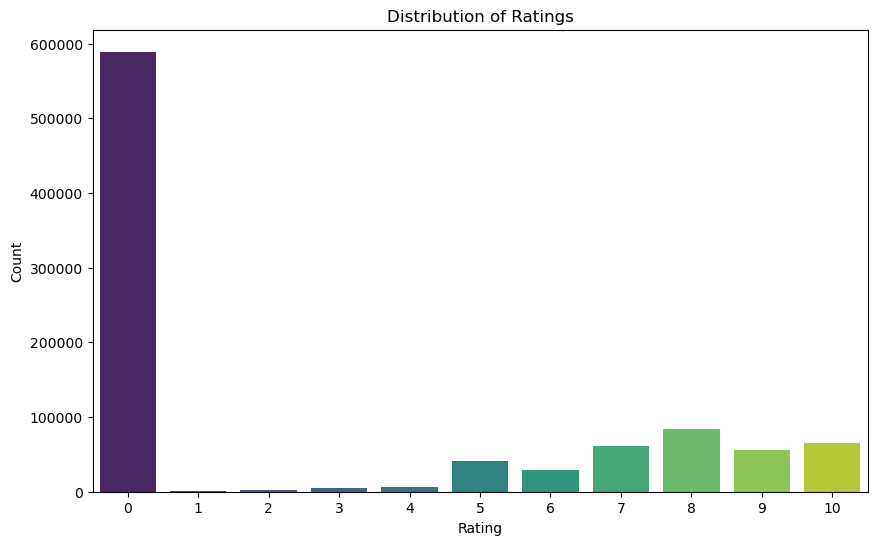

In [64]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=ratings, palette="viridis")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [72]:
# Top 10 most rated books
most_rated_books = ratings['ISBN'].value_counts().head(10)
print("Top 10 Most Rated Books:")
most_rated_books = most_rated_books.reset_index().merge(books,on = 'ISBN')[]
most_rated_books

Top 10 Most Rated Books:


,ISBN,count,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,971880107,2263,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...
1,316666343,1164,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
2,385504209,813,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...
3,312195516,668,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...
4,60928336,662,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.0...
5,044023722X,595,A Painted House,John Grisham,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...
6,142001740,555,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
7,067976402X,552,Snow Falling on Cedars,David Guterson,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...
8,671027360,536,Angels &amp; Demons,Dan Brown,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.0...
9,446672211,527,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.0...


In [74]:
# Most active users
most_active_users = ratings['User-ID'].value_counts().head(10)
print("Top 10 Most Active Users:")
most_active_users = most_active_users.reset_index()
most_active_users

Top 10 Most Active Users:


,User-ID,count
0,11676,11147
1,198711,6456
2,153662,5817
3,98391,5779
4,35859,5646
5,212898,4289
6,278418,3997
7,76352,3329
8,110973,2974
9,235105,2944


    Now we will look at Ratings dataset.From this we can get these information :-
        
        1) Age distribution and demographics.
        2) Geographic analysis of users.

/Users/revanthkumar/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


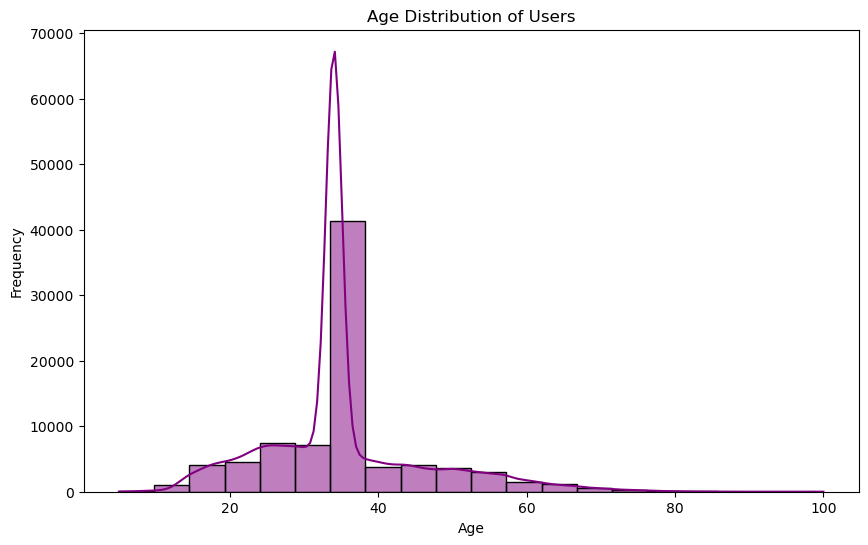

In [75]:
# Distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'].dropna(), bins=20, kde=True, color="purple")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

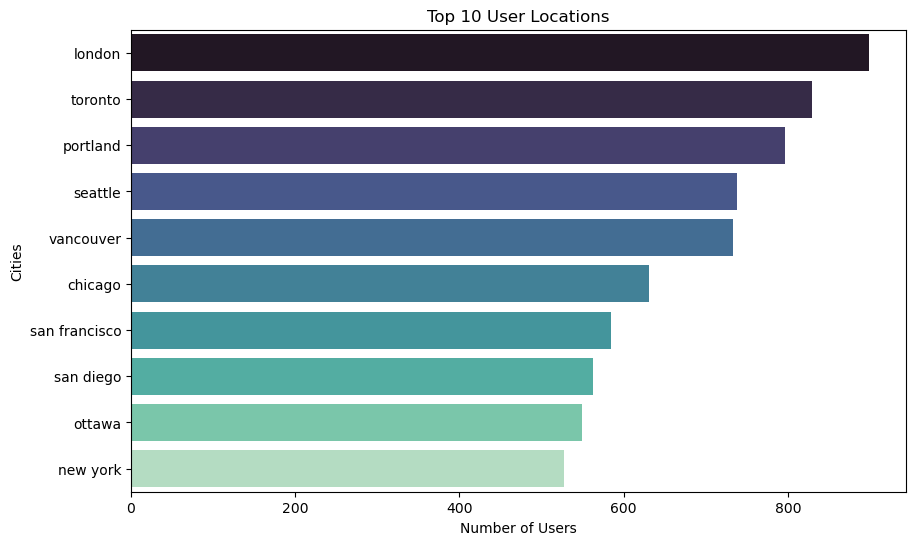

In [78]:
# Top 10 Cities
top_cities = users['city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="mako")
plt.title("Top 10 User Cities")
plt.xlabel("Number of Users")
plt.ylabel("Cities")
plt.show()

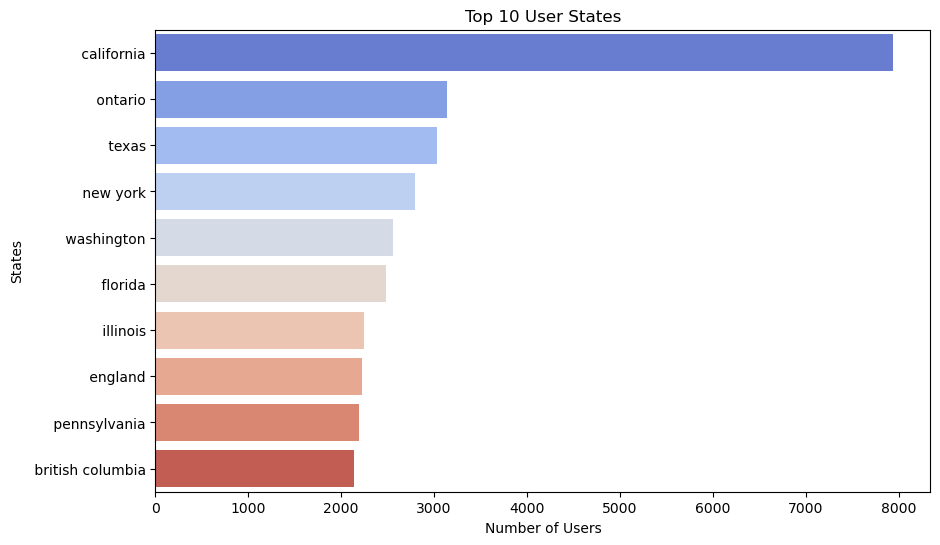

In [82]:
# Top 10 State
top_states = users['state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="coolwarm")
plt.title("Top 10 User States")
plt.xlabel("Number of Users")
plt.ylabel("States")
plt.show()

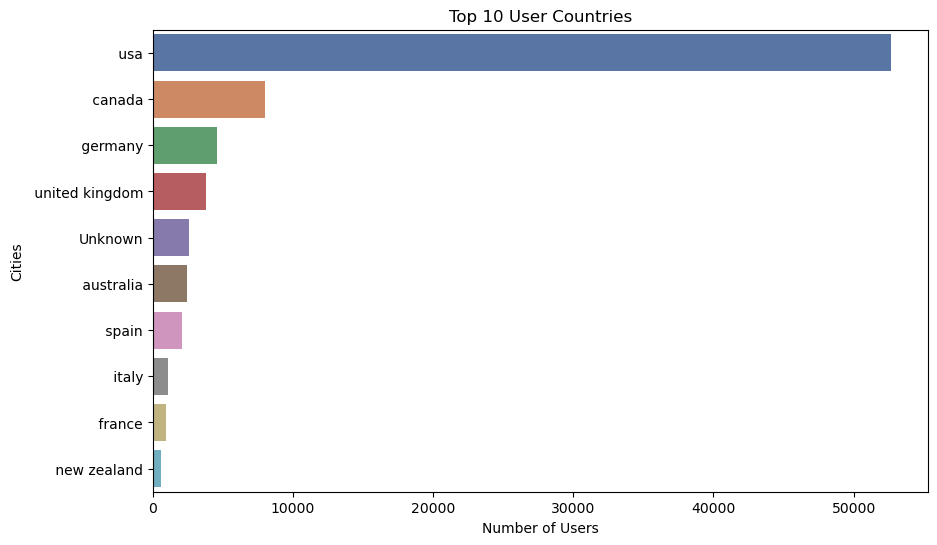

In [83]:
# Top 10 Countries
top_countries = users['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="deep")
plt.title("Top 10 User Countries")
plt.xlabel("Number of Users")
plt.ylabel("Cities")
plt.show()

    Now we will continue with model building part.

# Model Building 

## Popularity Based 

    We will show only top 50 highest average rated books in this system. But if there is book which have been 
    rated only two times then it's average rating will be 10 which is not very good so we are keeping a criteria       for which books should we take into account. 
    
    
    The criteria we keep are :-
          1) Book should be rated atleast 250 times.

In [85]:
ratings_with_name = ratings.merge(books, on='ISBN')

In [86]:
ratings_with_name['Book-Rating'] = ratings_with_name['Book-Rating'].astype(float)
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276726,155061224,5.0,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...
2,276727,446520802,0.0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3.0,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...
4,276729,521795028,6.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...
941100,250764,451410777,0.0,Sleep Tight (Onyx Book),Anne Frasier,2003.0,Onyx Books,http://images.amazon.com/images/P/0451410777.0...
941101,250764,452264464,8.0,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...
941102,250764,048623715X,0.0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982.0,Dover Publications,http://images.amazon.com/images/P/048623715X.0...
941103,250764,486256588,0.0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988.0,Dover Publications,http://images.amazon.com/images/P/0486256588.0...


In [87]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Allo 'Allo: the War Diaries of Rene Artois,1
2,Earth Prayers From around the World: 365 Pray...,9
3,Good Wives: Image and Reality in the Lives of...,10
4,Goosebumps Monster Edition 1: Welcome to Dead...,8
...,...,...
230207,ร?ย?l- Connection.,1
230208,ร?ย?lpiraten.,2
230209,ร?ย?rger mit Produkt X. Roman.,4
230210,ร?ย?stlich der Berge.,2


    This dataframe shows us book name and how many times they have been rated.

In [88]:
# Convert 'Book-Rating' to numeric (if not already)
ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

# Drop rows with missing or invalid 'Book-Rating'
ratings_with_name.dropna(subset=['Book-Rating'], inplace=True)

# Group by 'Book-Title' and calculate the mean of 'Book-Rating'
avg_rating_df = (
    ratings_with_name.groupby('Book-Title', as_index=False)['Book-Rating']
    .mean()
    .rename(columns={'Book-Rating': 'avg_rating'})
)

# Verify the result
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Allo 'Allo: the War Diaries of Rene Artois,5.000000
2,Earth Prayers From around the World: 365 Pray...,5.555556
3,Good Wives: Image and Reality in the Lives of...,3.200000
4,Goosebumps Monster Edition 1: Welcome to Dead...,2.500000
...,...,...
230207,ร?ย?l- Connection.,0.000000
230208,ร?ย?lpiraten.,0.000000
230209,ร?ย?rger mit Produkt X. Roman.,5.250000
230210,ร?ย?stlich der Berge.,4.000000


    This dataframe shows us book name and average rating.

In [89]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df['avg_rating'] = np.round(popular_df['avg_rating'],3)
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250
1,Allo 'Allo: the War Diaries of Rene Artois,1,5.000
2,Earth Prayers From around the World: 365 Pray...,9,5.556
3,Good Wives: Image and Reality in the Lives of...,10,3.200
4,Goosebumps Monster Edition 1: Welcome to Dead...,8,2.500
...,...,...,...
230207,ร?ย?l- Connection.,1,0.000
230208,ร?ย?lpiraten.,2,0.000
230209,ร?ย?rger mit Produkt X. Roman.,4,5.250
230210,ร?ย?stlich der Berge.,2,4.000


In [90]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating',ascending = False).head(50)

In [91]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [92]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,346,5.945
2,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,380,5.884
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,316,5.544
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,501,5.178
12,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,261,4.969
13,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,519,4.938
15,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,340,4.885
24,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,463,4.685
32,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,828,4.680
37,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,401,4.616


    These are the Top 50 books with highest rating.

## Collaborative Filtering Based  

    Criteria in this case are :-
    
        1) We will consider only users who have rated atleast 200 times.

    and 2) We will take books which have been rated  atleast 50 times.

In [93]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] >= 200
x[x]

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
250405    True
250764    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 740, dtype: bool

    We can see that only 740 users have rated atleast 200 times. Now we will take indexes of these users and form another datafram with only these users.

In [94]:
Top_users = x[x].index

In [95]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(Top_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
1153,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1154,277427,26217457,0.0,Vegetarian Times Complete Cookbook,Lucy Moll,1995.0,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
1155,277427,003008685X,8.0,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
1156,277427,30615321,0.0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982.0,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
1157,277427,60002050,0.0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002.0,Avon Books,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...
941100,250764,451410777,0.0,Sleep Tight (Onyx Book),Anne Frasier,2003.0,Onyx Books,http://images.amazon.com/images/P/0451410777.0...
941101,250764,452264464,8.0,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...
941102,250764,048623715X,0.0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982.0,Dover Publications,http://images.amazon.com/images/P/048623715X.0...
941103,250764,486256588,0.0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988.0,Dover Publications,http://images.amazon.com/images/P/0486256588.0...


    Now we can see that we have only 435417 rows remaining out of the whole data which is 941105 rows  done by 
    just 740 users.
    
    So 46.266% of the data has been done by approximately 0.884% of the users.
    
    As we have completed the filtering part of raters now we will do the part of books.

In [96]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [97]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
1153,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1166,277427,60930535,0.0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial,http://images.amazon.com/images/P/0060930535.0...
1168,277427,60934417,0.0,Bel Canto: A Novel,Ann Patchett,2002.0,Perennial,http://images.amazon.com/images/P/0060934417.0...
1171,277427,61009059,9.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...
1177,277427,006440188X,0.0,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...
941058,250764,446364673,0.0,The Gift,Kirk Douglas,1993.0,Warner Books,http://images.amazon.com/images/P/0446364673.0...
941079,250764,449907481,0.0,A Thousand Acres (Ballantine Reader's Circle),JANE SMILEY,1992.0,Ballantine Books,http://images.amazon.com/images/P/0449907481.0...
941086,250764,451180410,0.0,Mortal Fear,Greg Iles,1998.0,Signet Book,http://images.amazon.com/images/P/0451180410.0...
941088,250764,451191013,0.0,The Regulators,Stephen King,2002.0,Signet Book,http://images.amazon.com/images/P/0451191013.0...


     Now we will make a pivot table.

In [98]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace = True)

In [99]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,249111,249628,249862,249894,250184,250405,250764,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.metrics.pairwise import cosine_similarity

In [101]:
similarity_scores = cosine_similarity(pt)

In [102]:
similarity_scores.shape

(604, 604)

In [103]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [104]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg']]

In [105]:
#import pickle
#pickle.dump(popular_df,open('popular.pkl','wb'))

In [106]:
#pickle.dump(pt,open('pt.pkl','wb'))
#pickle.dump(books,open('books.pkl','wb'))
#pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))